In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import sys

[ 1.33833333  1.65083333  2.37166667  2.68416667  3.40625     3.71791667
  4.44083333  4.75        5.47791667  5.78208333  6.51541667  6.81333333
  7.55833333  7.84458333  8.14041667  8.87583333  9.17166667  9.90708333
 10.20125    10.49875    11.23       11.53875    12.25541667 12.57291667
 13.2825     13.60083333 14.30708333 14.625      15.3325     15.64875
 16.35708333 16.67208333 17.38208333 17.695      18.40625    18.71666667
 19.43125    19.73958333 20.45625    20.76041667 21.48458333 21.78333333
 22.5175     22.80541667 23.09875    23.82791667 24.12375    24.85416667
 25.15083333 25.44708333 26.1825     26.49666667 27.21875    27.53958333
 28.25625    28.57625    29.295      29.61041667 30.33208333 30.64375
 31.36791667 31.67375    32.40291667 32.70291667 33.4375     33.73208333
 34.47166667 34.75833333 35.50708333 35.78416667 36.06375    36.80833333
 37.0925     37.83333333 38.12083333 38.4125     39.15208333 39.46875
 40.18666667 40.51541667 41.22291667 41.55125   ]
[ 6.57 -0.

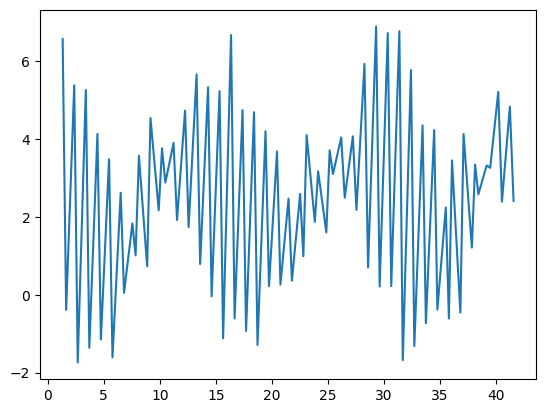

In [9]:
data = np.loadtxt("ASTR19_S22_group_project_data.txt")
x = np.zeros(41)
y= np.zeros(41)
a = 0
x1 = np.zeros(41)
y1 = np.zeros(41)
i = 0
while(i<82):
    if(i==0 or i ==1):
       x[a] = (data[i,1]/24.0)+1
    else:
       x[a] = (data[i,1]/24.0)+(1*a)+1
    y[a] = data[i,2]
    i+=2
    a+=1
a=0
i = 0
while(i<82):
    i+=1
    if(i==0 or i ==1):
       x1[a] = (data[i,1]/24.0)+1
    else:
       x1[a] = (data[i,1]/24.0)+(1*a)+1
    y1[a]=data[i,2]
    i+=1
    a+=1
x2 = np.zeros(82)
y2 = np.zeros(82)
a = 0
b = 1
for i in range(41):
    x2[a] = x[i]
    y2[a] = y[i]
    a += 2
for i in range(41):
    x2[b] = x1[i]
    y2[b] = y1[i]
    b+=2
print(x2)
print(y2)
plt.plot(x2,y2,'-')

-0.10613072679116572
-0.21103367317722083
2.6989461882400043


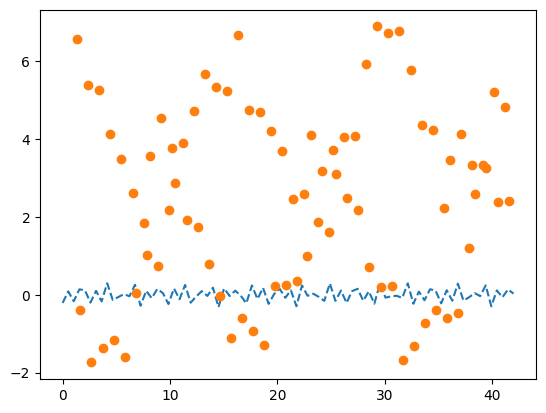

In [11]:
def os(x,a,b,w,g):
    return a*np.sin(w*x)+b*np.cos(g*x)
guess = [-4.2,3.1,2.7,6.9]
p, c = curve_fit(os,x2, y2, p0=guess)
b = np.linspace(0,42,82)
p1 = p[0]
print(p1)
p2 = p[1]
print(p2)
p3 = p[2]
print(p3)
p4 = p[3]
fit = os(b, p1, p2,p3,p4)
plt.plot(b, fit, '--', label='fit')
plt.plot(x2,y2,'o')